In [1]:
import cv2
import os
import random
import matplotlib.pylab as plt
import tqdm
%matplotlib inline
from glob import glob
import pandas as pd
import numpy as np

### Prepare file directories and image paths and load labels

In [2]:
PATH = "/volumes/data/chest_xray"

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "images")

# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.png"))

# Load labels
labels = pd.read_csv(PATH+'/sample_labels.csv')

In [3]:
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


### Show three random images

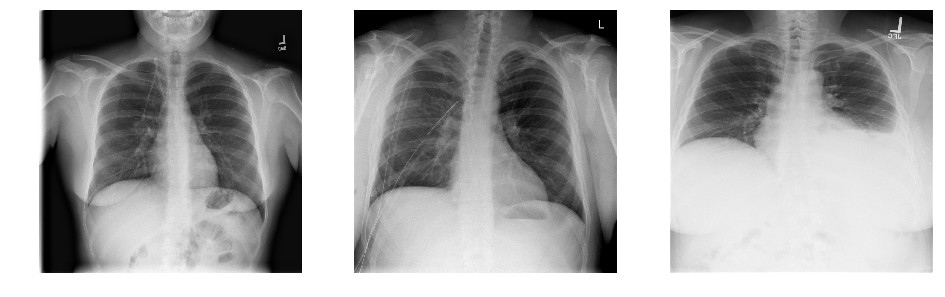

In [4]:
r = random.sample(images, 3)
r

plt.figure(figsize=(16,16))
plt.subplot(131)
plt.imshow(cv2.imread(r[0])), plt.axis('off')

plt.subplot(132)
plt.imshow(cv2.imread(r[1])), plt.axis('off')

plt.subplot(133)
plt.imshow(cv2.imread(r[2])), plt.axis('off');

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
5541,00030209_008.png,Infiltration,8,30209,010Y,M,AP,3056,2544,0.139,0.139


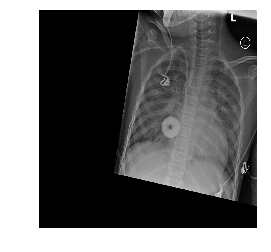

In [5]:
# Example of bad x-ray and good reason to use data augmentation
e = cv2.imread(os.path.join(SOURCE_IMAGES,'00030209_008.png'))

plt.imshow(e), plt.axis('off')

labels[labels["Image Index"] == '00030209_008.png']

### Turn images into arrays and make a list of classes

Images with Lung Infiltrations will be labeled "Infiltration" and everything else goes into "Not Infiltration". In this process I am creating two arrays, one for the images and one for the labels. I am also resizing the images from 1024x1024 to 128x128.

In [6]:
def proc_images():
    """
    Returns two arrays: 
        x is an array of resized images
        y is an array of labels
    """
    
    disease="No Finding"

    x = [] # images as arrays
    y = [] # labels Healthy or Not_Healthy
    WIDTH = 224 # To match densenet dimensions.
    HEIGHT = 224 

    for img in tqdm.tqdm(images):
        base = os.path.basename(img)
        finding = labels["Finding Labels"][labels["Image Index"] == base].values[0]

        # Read and resize image
        full_size_image = cv2.imread(img)
        x.append(cv2.resize(full_size_image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC))

        # Labels
        if disease in finding:
            #finding = str(disease)
            finding = 1
            y.append(finding)

        else:
            #finding = "Not_" + str(disease)
            finding = 0
            y.append(finding)

    return x,y

In [7]:
x,y = proc_images()

100%|██████████| 5606/5606 [02:49<00:00, 33.14it/s]


In [8]:
np.savez(os.path.join(PATH,"numpy_array", "x_images_arrays"), x)
np.savez(os.path.join(PATH,"numpy_array", "y_infiltration_labels"), y)

In [9]:
y= np.asarray(y)

In [10]:
print('No Finding: ', sum(y==1))
print('Other: ', sum(y==0))

No Finding:  3044
Other:  2562
